4.669978708303762e-13


<ipython-input-3-8a061a64d899>:105: RuntimeWarning: divide by zero encountered in divide
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
<ipython-input-3-8a061a64d899>:106: RuntimeWarning: divide by zero encountered in divide
  F_V_2 = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/(s_2)
<ipython-input-3-8a061a64d899>:107: RuntimeWarning: divide by zero encountered in divide
  F_V_3 = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0 + q_2*f_90 - (m_l_b - m_l_c)**2*f_plus)/(q_2*s_2)
<ipython-input-3-8a061a64d899>:114: RuntimeWarning: invalid value encountered in subtract
  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
<ipython-input-3-8a061a64d899>:115: RuntimeWarning: invalid value encountered in subtract
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
<ipython-input-3-8a061a64d899>:116: RuntimeWarning: invalid value encountered in add
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))
<ipython-input

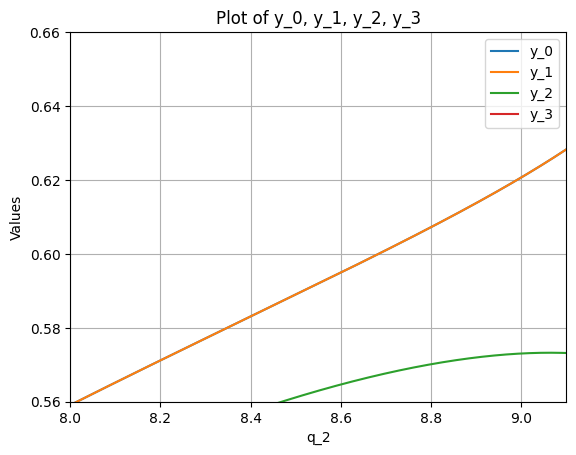

In [ ]:
#for tau mode

import numpy as np
from sympy import Symbol, integrate, sqrt, cos, exp
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_l_b = 1.409*10**(-12)

tau_total = 6.58*10**(-25)/tau_l_b
print(tau_total)

#masses(GeV)
m_l_b = 5.6202
m_l_c = 2.59225
m_tau = 1.77686
m_e = 0.000511
m_uon = 0.1057

m_l = m_tau
# Spacing and defining range

q_2 = np.linspace(m_l**2, (m_l_b - m_l_c)**2, 10000)



#error values
#er_V_cb = 1.1e-3
er_f_0_Ff = 0.064
er_f_plus_Ff = 0.0090
er_f_90_Ff = 0.0079
er_g_0_Ff = 0.011
er_g_plus_Ff = 0.064
er_g_90_Ff = 0.16

er_f_0_Af = 0.66
er_f_plus_Af = 0.31
er_f_90_Af = 0.25
er_g_0_Af = 0.33
er_g_plus_Af = 0.65
er_g_90_Af = 1.9


#defining error range

#V_cb_u = V_cb + er_V_cb
#V_cb_l = V_cb - er_V_cb

#f_0_u = (0.545 - er_f_0_Ff) + (-2.21+er_f_0_Af)*(w-1)
#f_0_l = (0.545 - er_f_0_Ff) + (-2.21-er_f_0_Af)*(w-1)

#f_plus_u = (0.1628 + er_f_plus_Ff) + (1.16 + er_f_plus_Af)*(w-1)
#f_plus_l = (0.1628 - er_f_plus_Ff) + (1.16 - er_f_plus_Af)*(w-1)

#f_90_u = (0.1690 + er_f_90_Ff) + (0.57 + er_f_90_Af)*(w-1)
#f_90_l = (0.1690 + er_f_90_Ff) + (0.57 + er_f_90_Af)*(w-1)

#g_0_u = (0.221 + er_g_0_Ff ) + (0.94 + er_g_0_Af )*(w-1)
#g_0_l = (0.221 - er_g_0_Ff ) + (0.94 - er_g_0_Af )*(w-1)

#g_plus_u = (0.582 + er_g_plus_Ff) + (-2.24 + er_g_plus_Af)*(w-1)
#g_plus_l = (0.582 - er_g_plus_Ff) + (-2.24 - er_g_plus_Af)*(w-1)

#g_90_u = (1.22 + er_g_90_Ff) + (-6.1 + er_g_90_Af)*(w-1)
#g_90_l = (1.22 - er_g_90_Ff) + (-6.1 - er_g_90_Af)*(w-1)

#S_L =[0,0.15,0,-0.37]
#S_R =[0,0,0.16,0.48]
def D_gamma_tau(g_L,g_R,m_l,q_2):

  #g_L = 0
  #g_R = 0
  g_S = 0
  g_P = 0

  lamda_l = ((m_l_b-m_l_c)**2 -q_2)*((m_l_b+m_l_c)**2-q_2)

  sigma_G =  1
  m_1 = m_l_b + m_l_c
  m_2 = m_l_b - m_l_c

  Q_1 = m_1**2 - q_2      #Qplus
  Q_2 = m_2**2 - q_2      #Qminus


  w = ((m_l_b**2 + m_l_c**2-q_2)/(2*m_l_b*m_l_c))
  s_1 = (m_l_b + m_l_c)**2 - q_2    #s-plus
  s_2 = (m_l_b - m_l_c)**2 - q_2    # s- minus

  #form factors
  f_0 = 0.545 + (-2.21)*(w-1)
  f_plus = 0.1628 + 1.16*(w-1)
  f_90 = 0.1690 + 0.57*(w-1)

  g_0 = 0.221 +  0.94*(w-1)
  g_plus = 0.582 + (-2.24)*(w-1)
  g_90 = 1.22 + (-6.1)*(w-1)



  #helicty amplitudes
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
  F_V_2 = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/(s_2)
  F_V_3 = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0 + q_2*f_90 - (m_l_b - m_l_c)**2*f_plus)/(q_2*s_2)

  F_A_1 = sigma_G*((m_l_b + m_l_c)**(2)*((g_90 - g_plus)/s_1)) - g_90
  F_A_2 = -(sigma_G*m_l_b*(m_l_b + m_l_c)*(g_90 - g_plus)/s_1)
  F_A_3 = sigma_G*((m_l_b*(m_l_b - m_l_c)*(-s_1*g_0 - q_2*g_90 + (m_l_b + m_l_c)**2*g_plus))/(q_2*s_1))


  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))

  H_A_t = (1+ g_L - g_R)*(np.sqrt(Q_1/q_2)*(F_A_1*m_2 + F_A_3*(q_2/m_l_b)))
  H_A_0 = (1+ g_L - g_R)*(np.sqrt(Q_2/q_2)*(F_A_1*m_1 + F_A_2*(q_2/m_l_b)))
  H_A_1 = (1+ g_L - g_R)*(np.sqrt(2*Q_2)*(-F_A_1 - F_A_2*(m_1/m_l_b)))


  #B_SM_1
  H_phalf_0 = H_V_0 - H_A_0
  H_mhalf_0 = H_V_0 + H_A_0
  H_phalf_1 = H_V_1 - H_A_1
  H_mhalf_1 = H_V_1 + H_A_1
  H_phalf_t = H_V_t - H_A_t
  H_mhalf_t = H_V_t + H_A_t

  B_SM_1 = abs(H_phalf_0)**2 + abs(H_mhalf_0)**2 + abs(H_phalf_1)**2 + abs(H_mhalf_1)**2
  B_SM_2 = abs(H_phalf_0)**2 + abs(H_mhalf_0)**2 + abs(H_phalf_1)**2 + abs(H_mhalf_1)**2 + 3*(abs(H_phalf_t)**2 + abs(H_mhalf_t)**2)

  #B_NP
  H_S_0 = (g_S*np.sqrt(Q_1)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))/(m_l_b - m_l_c)
  H_P_0 = (-g_P*np.sqrt(Q_2)*(F_A_1*m_2 + F_A_3*(q_2/m_l_b)))/(m_l_b + m_l_c)
  H_SP_phalf_0 = H_P_0 + H_S_0
  H_SP_mhalf_0 = -H_P_0 + H_S_0

  B_NP_3 = abs(H_SP_phalf_0)**2 + abs(H_SP_mhalf_0)**2

  #B_int_4
  B_int_4 = (H_phalf_t*np.conjugate(H_SP_phalf_0) + H_mhalf_t*np.conjugate(H_SP_mhalf_0)).real





  #differential decay distribution
  p_l_c = (np.sqrt(lamda_l))/(2*m_l_b)
  gamma_0 = ((G_F**(2))*abs(V_cb)**2*q_2*abs(p_l_c)/(192*np.pi**3*m_l_b**2))*(1-(m_l**2/q_2))**2
  D_gamma_tau = gamma_0*(B_SM_1 +((m_l**2)/(2*q_2))*B_SM_2 + (3/2)*B_NP_3 + (3*m_l/np.sqrt(q_2))*B_int_4)
#print(gamma_0)
  return D_gamma_tau

def D_gamma_tau_u(m_l,q_2):
  g_L = 0
  g_R = 0
  g_S = 0
  g_P = 0

  lamda_l = ((m_l_b-m_l_c)**2 -q_2)*((m_l_b+m_l_c)**2-q_2)

  sigma_G =  1
  m_1 = m_l_b + m_l_c
  m_2 = m_l_b - m_l_c

  Q_1 = m_1**2 - q_2      #Qplus
  Q_2 = m_2**2 - q_2      #Qminus


  w = ((m_l_b**2 + m_l_c**2-q_2)/(2*m_l_b*m_l_c))
  s_1 = (m_l_b + m_l_c)**2 - q_2    #s-plus
  s_2 = (m_l_b - m_l_c)**2 - q_2    # s- minus

  #form factors
  f_0_u = (0.545 + er_f_0_Ff) + (-2.21+er_f_0_Af)*(w-1)
  f_plus_u = (0.1628 + er_f_plus_Ff) + (1.16 + er_f_plus_Af)*(w-1)
  f_90_u = (0.1690 + er_f_90_Ff) + (0.57 + er_f_90_Af)*(w-1)

  g_0_u = (0.221 + er_g_0_Ff ) + (0.94 + er_g_0_Af )*(w-1)
  g_plus_u = (0.582 + er_g_plus_Ff) + (-2.24 + er_g_plus_Af)*(w-1)
  g_90_u = (1.22 + er_g_90_Ff) + (-6.1 + er_g_90_Af)*(w-1)




  #form factors
  F_V_1_u = sigma_G*(((m_l_b - m_l_c)**2*(f_90_u - f_plus_u)/s_2)) - f_90_u
  F_V_2_u = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90_u - f_plus_u)/(s_2)
  F_V_3_u = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0_u + q_2*f_90_u - (m_l_b - m_l_c)**2*f_plus_u)/(q_2*s_2)

  F_A_1_u = sigma_G*((m_l_b + m_l_c)**(2)*((g_90_u - g_plus_u)/s_1)) - g_90_u
  F_A_2_u = -(sigma_G*m_l_b*(m_l_b + m_l_c)*(g_90_u - g_plus_u)/s_1)
  F_A_3_u = sigma_G*((m_l_b*(m_l_b - m_l_c)*(-s_1*g_0_u - q_2*g_90_u + (m_l_b + m_l_c)**2*g_plus_u))/(q_2*s_1))

  #helicity amplitudes
  H_V_t_u = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1_u*m_1 - F_V_3_u*(q_2/m_l_b)))
  H_V_0_u = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1_u*m_2 - F_V_2_u*(q_2/m_l_b)))
  H_V_1_u = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1_u + F_V_2_u*(m_2/m_l_b)))

  H_A_t_u = (1+ g_L - g_R)*(np.sqrt(Q_1/q_2)*(F_A_1_u*m_2 + F_A_3_u*(q_2/m_l_b)))
  H_A_0_u = (1+ g_L - g_R)*(np.sqrt(Q_2/q_2)*(F_A_1_u*m_1 + F_A_2_u*(q_2/m_l_b)))
  H_A_1_u = (1+ g_L - g_R)*(np.sqrt(2*Q_2)*(-F_A_1_u - F_A_2_u*(m_1/m_l_b)))


  #B_SM_1
  H_phalf_0_u = H_V_0_u - H_A_0_u
  H_mhalf_0_u = H_V_0_u + H_A_0_u
  H_phalf_1_u = H_V_1_u - H_A_1_u
  H_mhalf_1_u = H_V_1_u + H_A_1_u
  H_phalf_t_u = H_V_t_u - H_A_t_u
  H_mhalf_t_u = H_V_t_u + H_A_t_u

  B_SM_1_u = abs(H_phalf_0_u)**2 + abs(H_mhalf_0_u)**2 + abs(H_phalf_1_u)**2 + abs(H_mhalf_1_u)**2
  B_SM_2_u = abs(H_phalf_0_u)**2 + abs(H_mhalf_0_u)**2 + abs(H_phalf_1_u)**2 + abs(H_mhalf_1_u)**2 + 3*(abs(H_phalf_t_u)**2 + abs(H_mhalf_t_u)**2)

  #B_NP
  H_S_0_u = (g_S*np.sqrt(Q_1)*(F_V_1_u*m_1 - F_V_3_u*(q_2/m_l_b)))/(m_l_b - m_l_c)
  H_P_0_u = (-g_P*np.sqrt(Q_2)*(F_A_1_u*m_2 + F_A_3_u*(q_2/m_l_b)))/(m_l_b + m_l_c)
  H_SP_phalf_0_u = H_P_0_u + H_S_0_u
  H_SP_mhalf_0_u = -H_P_0_u + H_S_0_u

  B_NP_3_u = abs(H_SP_phalf_0_u)**2 + abs(H_SP_mhalf_0_u)**2

  #B_int_4
  B_int_4_u = (H_phalf_t_u*np.conjugate(H_SP_phalf_0_u) + H_mhalf_t_u*np.conjugate(H_SP_mhalf_0_u)).real





  #differential decay distribution
  p_l_c = (np.sqrt(lamda_l))/(2*m_l_b)
  gamma_0_u = ((G_F**(2))*abs(V_cb)**2*q_2*abs(p_l_c)/(192*np.pi**3*m_l_b**2))*(1-(m_l**2/q_2))**2
  D_gamma_tau_u = gamma_0_u*(B_SM_1_u +((m_l**2)/(2*q_2))*B_SM_2_u + (3/2)*B_NP_3_u + (3*m_l/np.sqrt(q_2))*B_int_4_u)
  return D_gamma_tau_u


def D_gamma_tau_l(S_L,S_Rm_l,q_2):
  S_L = 0.15
  S_R = 0

  g_L = 0
  g_R = 0
  g_S = S_L + S_R
  g_P = S_L-S_R

  lamda_l = ((m_l_b-m_l_c)**2 -q_2)*((m_l_b+m_l_c)**2-q_2)

  sigma_G =  1
  m_1 = m_l_b + m_l_c
  m_2 = m_l_b - m_l_c

  Q_1 = m_1**2 - q_2      #Qplus
  Q_2 = m_2**2 - q_2      #Qminus


  w = ((m_l_b**2 + m_l_c**2-q_2)/(2*m_l_b*m_l_c))
  s_1 = (m_l_b + m_l_c)**2 - q_2    #s-plus
  s_2 = (m_l_b - m_l_c)**2 - q_2    # s- minus

  #form factors
  f_0_l = (0.545 - er_f_0_Ff) + (-2.21 - er_f_0_Af)*(w-1)
  f_plus_l = (0.1628 - er_f_plus_Ff) + (1.16 - er_f_plus_Af)*(w-1)
  f_90_l = (0.1690 - er_f_90_Ff) + (0.57 - er_f_90_Af)*(w-1)

  g_0_l = (0.221 - er_g_0_Ff ) + (0.94 - er_g_0_Af )*(w-1)
  g_plus_l = (0.582 - er_g_plus_Ff) + (-2.24 - er_g_plus_Af)*(w-1)
  g_90_l = (1.22 - er_g_90_Ff) + (-6.1 - er_g_90_Af)*(w-1)

  #form factors
  F_V_1_l = sigma_G*(((m_l_b - m_l_c)**2*(f_90_l - f_plus_l)/s_2)) - f_90_l
  F_V_2_l = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90_l - f_plus_l)/(s_2)
  F_V_3_l = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0_l + q_2*f_90_l - (m_l_b - m_l_c)**2*f_plus_l)/(q_2*s_2)

  F_A_1_l = sigma_G*((m_l_b + m_l_c)**(2)*((g_90_l - g_plus_l)/s_1)) - g_90_l
  F_A_2_l = -(sigma_G*m_l_b*(m_l_b + m_l_c)*(g_90_l - g_plus_l)/s_1)
  F_A_3_l = sigma_G*((m_l_b*(m_l_b - m_l_c)*(-s_1*g_0_l - q_2*g_90_l + (m_l_b + m_l_c)**2*g_plus_l))/(q_2*s_1))

  #helicity amplitudes
  H_V_t_l = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1_l*m_1 - F_V_3_l*(q_2/m_l_b)))
  H_V_0_l = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1_l*m_2 - F_V_2_l*(q_2/m_l_b)))
  H_V_1_l = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1_l + F_V_2_l*(m_2/m_l_b)))

  H_A_t_l = (1+ g_L - g_R)*(np.sqrt(Q_1/q_2)*(F_A_1_l*m_2 + F_A_3_l*(q_2/m_l_b)))
  H_A_0_l = (1+ g_L - g_R)*(np.sqrt(Q_2/q_2)*(F_A_1_l*m_1 + F_A_2_l*(q_2/m_l_b)))
  H_A_1_l = (1+ g_L - g_R)*(np.sqrt(2*Q_2)*(-F_A_1_l - F_A_2_l*(m_1/m_l_b)))


  #B_SM_1
  H_phalf_0_l = H_V_0_l - H_A_0_l
  H_mhalf_0_l = H_V_0_l + H_A_0_l
  H_phalf_1_l = H_V_1_l - H_A_1_l
  H_mhalf_1_l = H_V_1_l + H_A_1_l
  H_phalf_t_l = H_V_t_l - H_A_t_l
  H_mhalf_t_l = H_V_t_l + H_A_t_l

  B_SM_1_l = abs(H_phalf_0_l)**2 + abs(H_mhalf_0_l)**2 + abs(H_phalf_1_l)**2 + abs(H_mhalf_1_l)**2
  B_SM_2_l = abs(H_phalf_0_l)**2 + abs(H_mhalf_0_l)**2 + abs(H_phalf_1_l)**2 + abs(H_mhalf_1_l)**2 + 3*(abs(H_phalf_t_l)**2 + abs(H_mhalf_t_l)**2)

  #B_NP
  H_S_0_l = (g_S*np.sqrt(Q_1)*(F_V_1_l*m_1 - F_V_3_l*(q_2/m_l_b)))/(m_l_b - m_l_c)
  H_P_0_l = (-g_P*np.sqrt(Q_2)*(F_A_1_l*m_2 + F_A_3_l*(q_2/m_l_b)))/(m_l_b + m_l_c)
  H_SP_phalf_0_l = H_P_0_l + H_S_0_l
  H_SP_mhalf_0_l = -H_P_0_l + H_S_0_l

  B_NP_3_l = abs(H_SP_phalf_0_l)**2 + abs(H_SP_mhalf_0_l)**2

  #B_int_4
  B_int_4_l = (H_phalf_t_l*np.conjugate(H_SP_phalf_0_l) + H_mhalf_t_l*np.conjugate(H_SP_mhalf_0_l)).real





  #differential decay distribution
  p_l_c = (np.sqrt(lamda_l))/(2*m_l_b)
  gamma_0_l = ((G_F**(2))*abs(V_cb)**2*q_2*abs(p_l_c)/(192*np.pi**3*m_l_b**2))*(1-(m_l**2/q_2))**2
  D_gamma_tau_l = gamma_0_l*(B_SM_1_l +((m_l**2)/(2*q_2))*B_SM_2_l + (3/2)*B_NP_3_l + (3*m_l/np.sqrt(q_2))*B_int_4_l)
  return D_gamma_tau_l

# Calculate y values
y_0 = D_gamma_tau(0, 0, m_tau, q_2) / D_gamma_tau(0, 0, m_uon, q_2)
y_1 = D_gamma_tau(0.15, 0, m_tau, q_2) / D_gamma_tau(0.15, 0, m_uon, q_2)
y_2 = D_gamma_tau(0, 0.16, m_tau, q_2) / D_gamma_tau(0, 0.16, m_uon, q_2)
y_3 = D_gamma_tau(-0.37, 0.48, m_tau, q_2) / D_gamma_tau(-0.37, 0.48, m_uon, q_2)

# Plot
#plt.figure(figsize=(10, 6))
plt.ylim(0.56,0.66)
plt.xlim(8,9.1)
plt.plot(q_2, y_0, label='y_0')
plt.plot(q_2, y_1, label='y_1')
plt.plot(q_2, y_2, label='y_2')
plt.plot(q_2, y_3, label='y_3')
plt.xlabel('q_2')
plt.ylabel('Values')
plt.title('Plot of y_0, y_1, y_2, y_3')
plt.legend()
plt.grid(True)
plt.show()









In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your functions D_gamma_tau and m_tau, m_l_b, m_l_c, m_uon if not defined already

# Define q_2 range
m_tau = 1.777  # Example value, replace with actual value
m_l_b = 5.279  # Example value, replace with actual value
m_l_c = 1.27   # Example value, replace with actual value
m_uon = 0.1057  # Example value, replace with actual value
q_2 = np.linspace(m_tau**2, (m_l_b - m_l_c)**2, 1000)

# Define functions
def D_gamma_tau(param1, param2, m_tau, q_2):
    # Define your function here
    return  # Define your function here

# Calculate y values
y_0 = D_gamma_tau(0, 0, m_tau, q_2) / D_gamma_tau(0, 0, m_uon, q_2)
y_1 = D_gamma_tau(0.15, 0, m_tau, q_2) / D_gamma_tau(0.15, 0, m_uon, q_2)
y_2 = D_gamma_tau(0, 0.16, m_tau, q_2) / D_gamma_tau(0, 0.16, m_uon, q_2)
y_3 = D_gamma_tau(-0.37, 0.48, m_tau, q_2) / D_gamma_tau(-0.37, 0.48, m_uon, q_2)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(q_2, y_0, label='y_0')
plt.plot(q_2, y_1, label='y_1')
plt.plot(q_2, y_2, label='y_2')
plt.plot(q_2, y_3, label='y_3')
plt.xlabel('q_2')
plt.ylabel('Values')
plt.title('Plot of y_0, y_1, y_2, y_3')
plt.legend()
plt.grid(True)
plt.show()


TypeError: unsupported operand type(s) for /: 'NoneType' and 'NoneType'

<ipython-input-20-4aac6f0fb446>:105: RuntimeWarning: divide by zero encountered in divide
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
<ipython-input-20-4aac6f0fb446>:106: RuntimeWarning: divide by zero encountered in divide
  F_V_2 = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/(s_2)
<ipython-input-20-4aac6f0fb446>:107: RuntimeWarning: divide by zero encountered in divide
  F_V_3 = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0 + q_2*f_90 - (m_l_b - m_l_c)**2*f_plus)/(q_2*s_2)
<ipython-input-20-4aac6f0fb446>:114: RuntimeWarning: invalid value encountered in subtract
  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
<ipython-input-20-4aac6f0fb446>:115: RuntimeWarning: invalid value encountered in subtract
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
<ipython-input-20-4aac6f0fb446>:116: RuntimeWarning: invalid value encountered in add
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))
<ipython

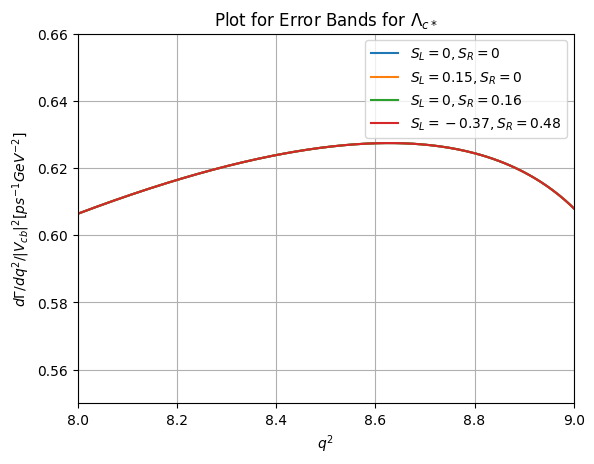

In [ ]:
q_2 = np.linspace(m_tau**2,(m_l_b-m_l_c)**2,1000)
y_0 = (D_gamma_tau(0,0,m_tau,q_2)/D_gamma_tau(0,0,m_uon,q_2))
y_1 = (D_gamma_tau(0.15,0,m_tau,q_2)/D_gamma_tau(0.15,0,m_uon,q_2))
y_2 = (D_gamma_tau(0,0.16,m_tau,q_2)/D_gamma_tau(0,0.16,m_uon,q_2))
y_3 = (D_gamma_tau(-0.37,0.48,m_tau,q_2)/D_gamma_tau(-0.37,0.48,m_uon,q_2))


<ipython-input-2-58be6de6cd9e>:103: RuntimeWarning: divide by zero encountered in divide
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
<ipython-input-2-58be6de6cd9e>:104: RuntimeWarning: divide by zero encountered in divide
  F_V_2 = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/(s_2)
<ipython-input-2-58be6de6cd9e>:105: RuntimeWarning: divide by zero encountered in divide
  F_V_3 = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0 + q_2*f_90 - (m_l_b - m_l_c)**2*f_plus)/(q_2*s_2)
<ipython-input-2-58be6de6cd9e>:112: RuntimeWarning: invalid value encountered in subtract
  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
<ipython-input-2-58be6de6cd9e>:113: RuntimeWarning: invalid value encountered in subtract
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
<ipython-input-2-58be6de6cd9e>:114: RuntimeWarning: invalid value encountered in add
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))
<ipython-input

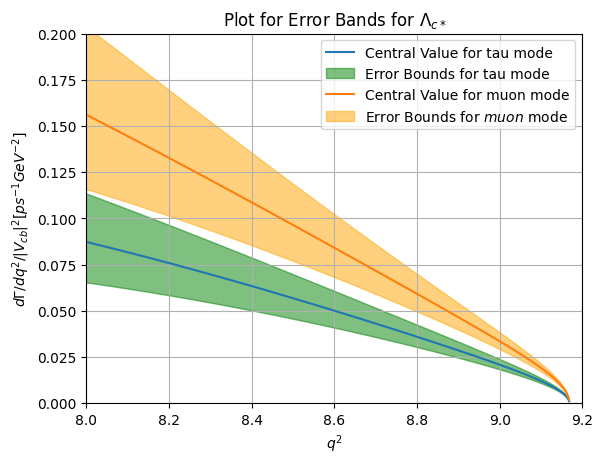

In [ ]:
y = (D_gamma_tau(m_tau,q_2) /abs(V_cb)**2)*(1.52*10**(12))
# Calculate corresponding y values with upper and lower bounds of errors


y_u = (D_gamma_tau_u(m_tau,q_2) /abs(V_cb)**2)*(1.52*10**(12))
y_l = (D_gamma_tau_l(m_tau,q_2) /abs(V_cb)**2)*(1.52*10**(12))

# Create the plot with shaded error region
plt.plot(q_2, y , label='Central Value for tau mode')
plt.fill_between(q_2, y_l, y_u, color='green', alpha=0.5, label='Error Bounds for tau mode ')

m_uon = 0.1057
y_o = (D_gamma_tau(m_uon,q_2) /abs(V_cb)**2)*(1.52*10**(12))

# Calculate corresponding y values with upper and lower bounds of errors


y_u_o = (D_gamma_tau_u(m_uon,q_2) /abs(V_cb)**2)*(1.52*10**(12))
y_l_o = (D_gamma_tau_l(m_uon,q_2) /abs(V_cb)**2)*(1.52*10**(12))
plt.plot(q_2, y_o , label='Central Value for muon mode')
plt.fill_between(q_2, y_l_o, y_u_o, color='orange', alpha=0.5, label='Error Bounds for $muon$ mode')


# Set plot attributes
plt.xlim(8, 9.2)
plt.ylim(0, 0.20)
plt.xlabel('$q^2$')
plt.ylabel('$d\Gamma/dq^2/|V_{cb}|^2 [ps^{-1} GeV^{-2}]$')
plt.title('Plot for Error Bands for $\Lambda_{c*}$')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()